In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

# regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


# Home Assignment 1 - Regression and Classification Models

Aim:

    Students should provide the best possible regression and classification models using Decision Trees and Linear models
    Models should examine different hyperparameters and select the best one [Remember: everything else being similar, the simplest models should be prefered]
    It is expected a full testing and validation cycle of model selection and evaluation

Objective 1

    Produce the best regression model for critical_temp (Dependent Variable)

Objective 2

    Produce the best binary classification model assuming as positive all instances with values of critical_temp >= 80.0 and as negatives all remaining cases


#### 0.1. Data Preparation

In [2]:
# Load data
df = pd.read_csv("HA1-DatasetScaled.tsv", sep="\t")

In [3]:
# Check data
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,52.0
1,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,50.0
2,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,41.5
3,-2.1737,-2.5469,-1.8316,-1.9110,-1.2742,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,0.7124,0.9014,0.8055,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,32.0
4,-2.1737,-1.5994,-0.9850,-1.0041,-0.5006,-3.2043,-2.6712,-2.1218,-1.2523,-2.2206,...,-0.9684,-1.0090,-0.8995,-3.3123,-2.7858,-1.6406,-1.5235,-1.7297,-1.4782,29.0


In [4]:
# Check if any column has a missing value overall (not per row)
print(df.isnull().values.any())

False


**Note to self:** 
To scale or not to scale -  Algorithms that Don't Require Scaling:

    Tree-Based Algorithms: Decision trees, random forests, and gradient boosting algorithms (e.g., XGBoost) are not sensitive to feature scaling because they make decisions based on feature thresholds.
    Naive Bayes: Naive Bayes classifiers are not affected by feature scaling because they estimate class probabilities based on feature distributions.

#### 0.2: Data Splitting

In [5]:
# Split data into training and test set
from sklearn.model_selection import train_test_split

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(df.drop('critical_temp', axis=1), df['critical_temp'], test_size=0.2, random_state=42)

# Split data into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# X_train, y_train: Training data
# X_val, y_val: Validation data
# X_test, y_test: Test data

### **Objective 1** - Produce the best regression model for critical_temp (Dependent Variable)

#### 1.1: Model training, testing and evaluation

In [6]:
# LINEAR REGRESSION MODEL #

# Train model
reg1 = LinearRegression().fit(X_train, y_train)

# Predict on validation set
y_pred1_val = reg1.predict(X_val)

# Predict on test set
y_pred1_test = reg1.predict(X_test)


In [7]:
# RIDGE REGRESSION MODEL #

# Train model
reg2 = Ridge(alpha=1.0).fit(X_train, y_train) # alpha=1.0 is default

# Predict on validation set
y_pred2_val = reg2.predict(X_val)

# Predict on test set
y_pred2_test = reg2.predict(X_test)

In [8]:
# LASSO REGRESSION MODEL #

# Train model
reg3 = Lasso(alpha=1.0).fit(X_train, y_train) # alpha=1.0 is default

# Predict on validation set
y_pred3_val = reg3.predict(X_val)

# Predict on test set
y_pred3_test = reg3.predict(X_test)

In [9]:
# SUPPORT VECTOR MACHINE REGRESSION MODEL #

# Train model
reg4 = svm.SVR().fit(X_train, y_train)

# Predict on validation set
y_pred4_val = reg4.predict(X_val)

# Predict on test set
y_pred4_test = reg4.predict(X_test)

In [10]:
# RANDOM FOREST REGRESSION MODEL #

# Train model
reg5 = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train, y_train) # max_depth=2 is default

# Predict on validation set
y_pred5_val = reg5.predict(X_val)

# Predict on test set
y_pred5_test = reg5.predict(X_test)

In [11]:
# GRADIENT BOOSTING REGRESSION MODEL #

# Train model
reg6 = GradientBoostingRegressor(random_state=0).fit(X_train, y_train)

# Predict on validation set
y_pred6_val = reg6.predict(X_val)

# Predict on test set
y_pred6_test = reg6.predict(X_test)

In [12]:
# NEURAL NETWORK REGRESSION MODEL #

# Train model
reg7 = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train) # max_iter=500 is default

# Predict on validation set
y_pred7_val = reg7.predict(X_val)

# Predict on test set
y_pred7_test = reg7.predict(X_test)

C:\Users\antun\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


#### 1.2: Results

In [13]:
# Table with the results of the models

# List with the names of the models
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Support Vector Machine Regression', 'Random Forest Regression', 'Gradient Boosting Regression', 'Neural Network Regression']

# List with the VALIDATION predictions of the models
predictions_val = [y_pred1_val, y_pred2_val, y_pred3_val, y_pred4_val, y_pred5_val, y_pred6_val, y_pred7_val]

# List with the TEST predictions of the models
predictions_test = [y_pred1_test, y_pred2_test, y_pred3_test, y_pred4_test, y_pred5_test, y_pred6_test, y_pred7_test]


# Lists with the mean squared error, mean absolute error and R2 scores of the models for the VALIDATION set
mse_val = [mean_squared_error(y_val, y_pred1_val), mean_squared_error(y_val, y_pred2_val), mean_squared_error(y_val, y_pred3_val), mean_squared_error(y_val, y_pred4_val), mean_squared_error(y_val, y_pred5_val), mean_squared_error(y_val, y_pred6_val), mean_squared_error(y_val, y_pred7_val)]
mae_val = [mean_absolute_error(y_val, y_pred1_val), mean_absolute_error(y_val, y_pred2_val), mean_absolute_error(y_val, y_pred3_val), mean_absolute_error(y_val, y_pred4_val), mean_absolute_error(y_val, y_pred5_val), mean_absolute_error(y_val, y_pred6_val), mean_absolute_error(y_val, y_pred7_val)]
r2_val = [r2_score(y_val, y_pred1_val), r2_score(y_val, y_pred2_val), r2_score(y_val, y_pred3_val), r2_score(y_val, y_pred4_val), r2_score(y_val, y_pred5_val), r2_score(y_val, y_pred6_val), r2_score(y_val, y_pred7_val)]

# Lists with the mean squared error, mean absolute error and R2 scores of the models for the TEST set
mse_test = [mean_squared_error(y_test, y_pred1_test), mean_squared_error(y_test, y_pred2_test), mean_squared_error(y_test, y_pred3_test), mean_squared_error(y_test, y_pred4_test), mean_squared_error(y_test, y_pred5_test), mean_squared_error(y_test, y_pred6_test), mean_squared_error(y_test, y_pred7_test)]
mae_test = [mean_absolute_error(y_test, y_pred1_test), mean_absolute_error(y_test, y_pred2_test), mean_absolute_error(y_test, y_pred3_test), mean_absolute_error(y_test, y_pred4_test), mean_absolute_error(y_test, y_pred5_test), mean_absolute_error(y_test, y_pred6_test), mean_absolute_error(y_test, y_pred7_test)]
r2_test = [r2_score(y_test, y_pred1_test), r2_score(y_test, y_pred2_test), r2_score(y_test, y_pred3_test), r2_score(y_test, y_pred4_test), r2_score(y_test, y_pred5_test), r2_score(y_test, y_pred6_test), r2_score(y_test, y_pred7_test)]


# Create a table with the results of the models
results = pd.DataFrame({'Model': models, 'MSE_val': mse_val, 'MAE_val': mae_val, 'R2_val': r2_val, 'MSE_test': mse_test, 'MAE_test': mae_test, 'R2_test': r2_test})

# Show table
results

,Model,MSE_val,MAE_val,R2_val,MSE_test,MAE_test,R2_test
0,Linear Regression,315.730990,13.477217,0.728325,317.671804,13.490915,0.734577
1,Ridge Regression,316.372216,13.488380,0.727773,317.833453,13.486955,0.734442
2,Lasso Regression,408.788153,15.646186,0.648253,421.128198,15.964984,0.648137
3,Support Vector Machine Regression,283.283463,11.005453,0.756245,276.638029,10.786417,0.768862
4,Random Forest Regression,402.610045,13.986993,0.653569,399.366336,13.828032,0.666320
5,Gradient Boosting Regression,171.627125,8.917092,0.852321,161.437061,8.566022,0.865115
6,Neural Network Regression,171.108035,8.629661,0.852768,160.395898,8.348320,0.865985


Gradient Boosting and Neural Network Regression appear to be the top-performing models, with the lowest error metrics and the highest R2 values on both the validation and test sets. These models demonstrate a better ability to predict the target variable compared to the other models in the evaluation.

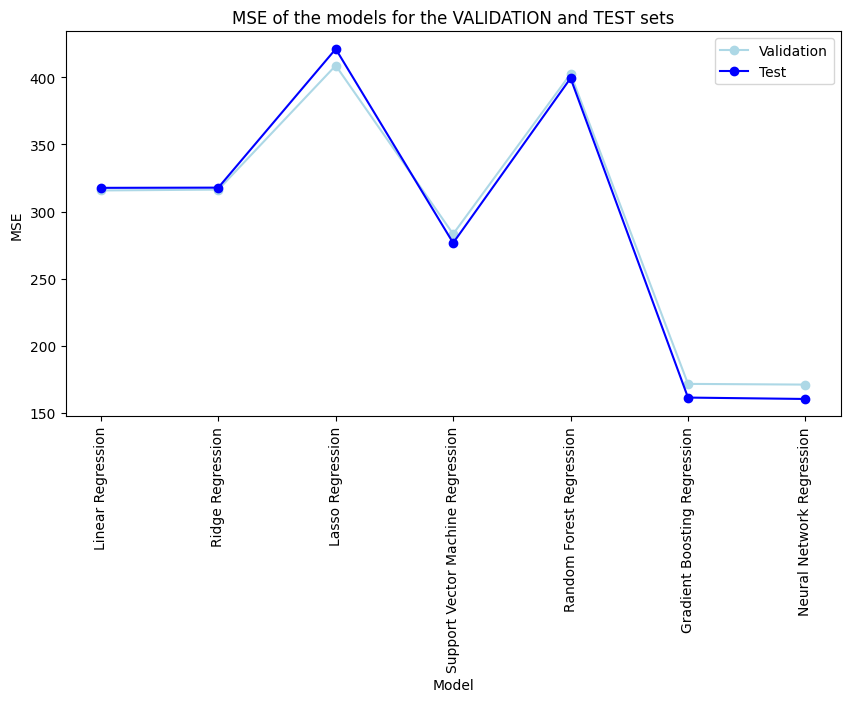

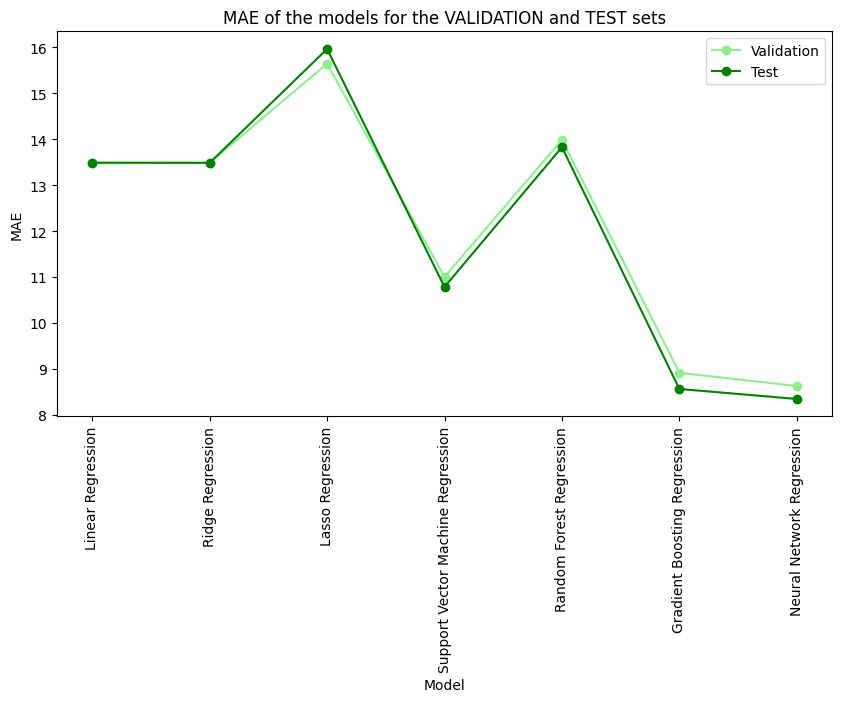

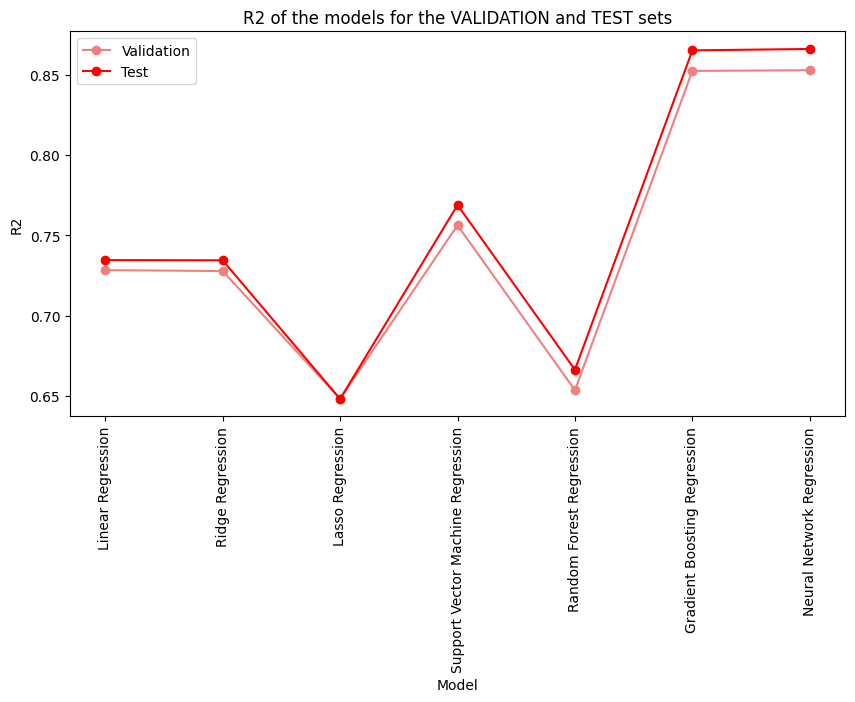

In [25]:
# Compare the results of the models

# Plot the MSE of both validation and test sets
plt.figure(figsize=(10,5))
# plot in pastel blues
plt.plot(models, mse_val, marker='o', color='lightblue')
plt.plot(models, mse_test, marker='o', color='blue')
plt.title('MSE of the models for the VALIDATION and TEST sets')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=90)
plt.legend(['Validation', 'Test'])
plt.show()

# Plot the MAE of both validation and test sets
plt.figure(figsize=(10,5))
# plot in light green tones
plt.plot(models, mae_val, marker='o', color='lightgreen')
plt.plot(models, mae_test, marker='o', color='green')
plt.title('MAE of the models for the VALIDATION and TEST sets')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.xticks(rotation=90)
plt.legend(['Validation', 'Test'])
plt.show()

# Plot the R2 of both validation and test sets
plt.figure(figsize=(10,5))
# plot in red tones
plt.plot(models, r2_val, marker='o', color='lightcoral')
plt.plot(models, r2_test, marker='o', color='red')
plt.title('R2 of the models for the VALIDATION and TEST sets')
plt.xlabel('Model')
plt.ylabel('R2')
plt.xticks(rotation=90)
plt.legend(['Validation', 'Test'])
plt.show()

### **Objective 2** - Produce the best binary classification model assuming as positive all instances with values of critical_temp >= 80.0 and as negatives all remaining cases